# Linear Regression Stochastic Gradient Descent Assignment

# Import Neccessary  Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection  import train_test_split
from matplotlib.animation import FuncAnimation
import  matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler


# Import Data from CSV File

In [2]:
np.random.seed(0)
df = pd.read_csv('./data-sets/Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Split Data into X and Y

In [5]:
X = df['YearsExperience']
y = df['Salary']
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X.values.reshape(-1,1)).flatten()
y = scaler_y.fit_transform(y.values.reshape(-1,1)).flatten()

# Split Data into Train and Test Data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot Data

Text(0.5, 1.0, 'Salary Data For Linear Regression')

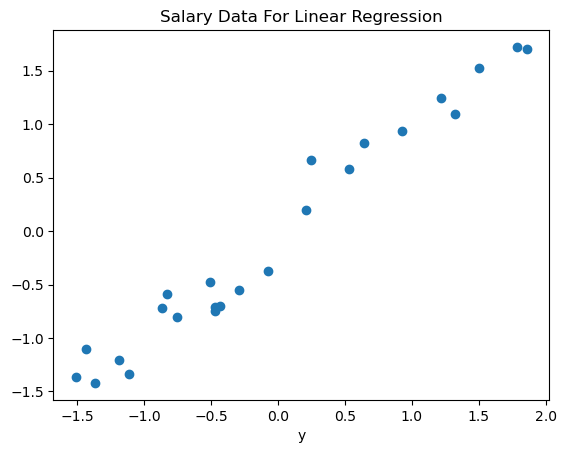

In [7]:
plt.scatter(x_train, y_train)
plt.xlabel('X')
plt.xlabel('y')
plt.title('Salary Data For Linear Regression')

# Define Loss Function

In [8]:
def error_function(y_true,  y_pred):
    #Calculating the loss or cost for MSE
    cost = np.sum((y_true - y_pred)**2) / len(y_true)
    # cost = np.mean((y_true - y_pred) ** 2)
    return cost

# Implement Gradient Descent

In [9]:
def batch_gradient_descent(x, y, batch_size, iterations, learning_rate, stopping_threshold=1e-6):
    current_weight = random.uniform(1, 7)
    current_bias = random.uniform(-2, 4)
    n = len(x)
    
    costs = []
    weights = []
    biases = []
    previous_cost = None
    
    for iteration in range(iterations):
        
        #Shuffle Data For Each Iteration
        indices = np.arange(n)
        np.random.shuffle(indices)
        
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        for i in range(0, batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            #Making Predictions
            y_predicted = (current_weight * x_batch) + current_bias
            current_cost = error_function(y_batch, y_predicted)
            
            if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
                return weights, biases, costs
            previous_cost = current_cost
            costs.append(current_cost)
            weights.append(current_weight)
            biases.append(current_bias)
            
            #MSE
            weight_derivate = -(2/len(x_batch)) * np.sum(x_batch * (y_batch - y_predicted))
            bias_derivate = -(2/len(x_batch)) * np.sum(y_batch - y_predicted)
            
            #Updating weights and bias
            current_weight = current_weight - (learning_rate * weight_derivate)
            current_bias = current_bias - (learning_rate * bias_derivate)
    return weights, biases, costs



# Plot Cost Function

In [10]:
iterations = 250
learning_rate = 0.05
batch_size = 16

In [22]:
%matplotlib tk

In [23]:
weights, biases, costs = batch_gradient_descent(x_train, y_train, batch_size, iterations, learning_rate)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 18))

#Plotting the data points and fit line

scatter = ax1.scatter(x_train, y_train, marker='o', color='red')
line, = ax1.plot(x_train, x_train * weights[0] + biases[0], color='blue', linestyle='dashed')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Data points and Fit Line")


#Plotting the cost curve
cost_line, = ax2.plot([], [], color='green')
ax2.set_xlim(0, len(costs))
ax2.set_ylim(0, max(costs))
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Cost")
ax2.set_title("Cost Curve")

#Plotting Costs vs. Weights
weight_cost_line, = ax3.plot([], [], color='purple', linestyle='-')
ax3.set_xlim(min(weights), max(weights))
ax3.set_ylim(0, max(costs))
ax3.set_xlabel("Weights")
ax3.set_ylabel("Cost")
ax3.set_title("Costs vs. Weights")

#Plotting Costs vs. Biases
bias_cost_line, = ax4.plot([], [], color='orange', linestyle='-')
ax4.set_xlim(min(biases), max(biases))
ax4.set_ylim(0, max(costs))
ax4.set_xlabel("Biases")
ax4.set_ylabel("Cost")
ax4.set_title("Costs vs. Biases")

def update(frame):
    #Update line fitting
    current_weight = weights[frame]
    current_bias = biases[frame]
    y_pred = current_weight * x_train + current_bias
    line.set_ydata(y_pred)
    # ax1.set_ylim(min(y_pred) - 5, max(y_pred) + 5)
    
    #Update cost curve
    cost_line.set_data(range(frame + 1), costs[:frame + 1])
    
    #Update Costs vs. Weights
    weight_cost_line.set_data(weights[:frame + 1], costs[:frame + 1])
    
    #Update Costs vs. Biases
    bias_cost_line.set_data(biases[:frame + 1], costs[:frame + 1])
    return line, cost_line, weight_cost_line, bias_cost_line

#Create animation
ani = FuncAnimation(fig, update, frames=len(weights), blit=False, interval=200)

plt.tight_layout()
plt.show()

c:\Users\PC\anaconda3\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [13]:
%matplotlib inline

# Get Best Weight And Bias

In [14]:
best_index = np.argmin(costs)
print("The best weight Steps", best_index)

best_model = {}
best_model['coef_'] = weights[best_index]
best_model['intercept_'] = biases[best_index]

print(best_model)

print(f"Best Weight: {best_model['coef_']} Best Bias: {best_model['intercept_']}")

The best weight Steps 543
{'coef_': 0.9769848631053807, 'intercept_': -0.04189386367585375}
Best Weight: 0.9769848631053807 Best Bias: -0.04189386367585375


# Get Latest Weight And Bias

In [15]:
print("Latest Index", len(costs) - 1)

latest_model = {}

latest_model['coef_'] = weights[-1]
latest_model['intercept_'] = biases[-1]

print(latest_model)

print(f'Latest Weight: {latest_model["coef_"]} Latest Bias {latest_model["intercept_"]}')

Latest Index 598
{'coef_': 0.9505728627443977, 'intercept_': -0.03505164328520861}
Latest Weight: 0.9505728627443977 Latest Bias -0.03505164328520861


# Create Y Prediction Model 

In [16]:
def LinearRegressionPredict(x_true):
    y_prediction = []
    for x_item in x_true:
        y = biases[best_index] + weights[best_index] * x_item
        y_prediction.append(y)
    return y_prediction

In [17]:
y_pred = LinearRegressionPredict(x_test)
print(y_pred)

[1.4590826667597723, -0.1866225493477181, 0.9688726023873281, -0.04656253095559142, -0.7818776275142573, -0.6068026045240987]


# Check Accuracy

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"R2 Score : {r2}")

R2 Score : 0.8957844351670332


# Plot Data

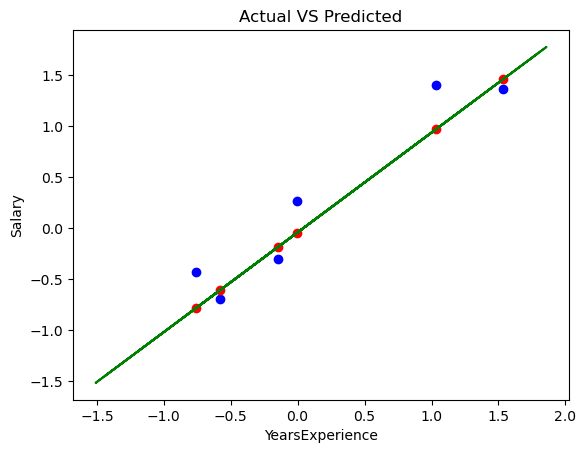

In [20]:
plt.title("Actual VS Predicted")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(x_test, y_test, c='b')
plt.scatter(x_test, y_pred, c='r')
plt.plot(x_train, weights[best_index] * x_train + biases[best_index], c='g')